#### First Importing important libararies

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

#### Importing data 

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### checking any missing value 

In [6]:
train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [7]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In traing set and test set of the data no missing value found.

In [8]:
y_train=train["label"]
X_train=train.drop(labels=["label"],axis=1)

In [9]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

##### Normalisation 

In [10]:
X_train=X_train/255.0
test=test/255.0

Now we have to reshape the data because the train and test set data given into 1D vector.
so I am reshaping the data into (28,28,1).here 28*28 is dimension and channel is 1.for colourfull image channel is 3.

##### Reshape the given data 

In [11]:
X_train = X_train.values.reshape(-1,28,28,1)

In [12]:
test=test.values.reshape(-1,28,28,1)

##### Applying OneHotEncoder 

In [13]:
y_train=to_categorical(y_train,num_classes=10)

#### Now spiliting the X_train data into traing datatset and validation dataset 

In [14]:
x_train,x_validation,Y_train,Y_validation=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

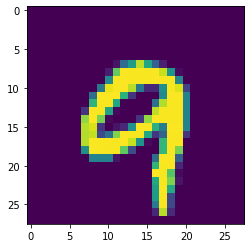

In [15]:
g = plt.imshow(x_train[783][:,:,0])

# CNN 

In [16]:
classifier=Sequential()
classifier.add(Convolution2D(filters=32,kernel_size=(5,5),padding="same",activation="relu",input_shape=(28,28,1)))
classifier.add(Convolution2D(filters=32,kernel_size=(5,5),padding="same",activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.25))


classifier.add(Convolution2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
classifier.add(Convolution2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
classifier.add(Dropout(0.25))

In [17]:
classifier.add(Flatten())
classifier.add(Dense(256,activation="relu"))
classifier.add(Dropout(0.5))
classifier.add(Dense(10,activation="softmax"))

In [18]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

#### Compiling and Optimization of the Model

In [19]:
opt=keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
classifier.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])

In [20]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
                                    samplewise_center=False,  # set each sample mean to 0
                                    featurewise_std_normalization=False,  # divide inputs by std of the dataset
                                    samplewise_std_normalization=False,  # divide each input by its std
                                    zca_whitening=False,  # apply ZCA whitening
                                    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
                                    zoom_range = 0.1, # Randomly zoom image 
                                    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                                    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                                    horizontal_flip=False,  # randomly flip images
                                    vertical_flip=False)  # randomly flip images)

train_datagen.fit(x_train)

In [21]:
history = classifier.fit_generator(train_datagen.flow(x_train,Y_train, batch_size=86),
                              epochs = 10, validation_data = (x_validation,Y_validation),
                              verbose = 2, steps_per_epoch=x_train.shape[0] // 86)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
439/439 - 120s - loss: 0.4301 - accuracy: 0.8606 - val_loss: 0.0556 - val_accuracy: 0.9824
Epoch 2/10
439/439 - 123s - loss: 0.1291 - accuracy: 0.9617 - val_loss: 0.0444 - val_accuracy: 0.9850
Epoch 3/10
439/439 - 123s - loss: 0.0926 - accuracy: 0.9726 - val_loss: 0.0315 - val_accuracy: 0.9888
Epoch 4/10
439/439 - 123s - loss: 0.0782 - accuracy: 0.9771 - val_loss: 0.0326 - val_accuracy: 0.9902
Epoch 5/10
439/439 - 123s - loss: 0.0699 - accuracy: 0.9798 - val_loss: 0.0352 - val_accuracy: 0.9893
Epoch 6/10
439/439 - 122s - loss: 0.0639 - accuracy: 0.9815 - val_loss: 0.0390 - val_accuracy: 0.9881
Epoch 7/10
439/439 - 132s - loss: 0.0605 - accuracy: 0.9823 - val_loss: 0.0385 - val_accuracy: 0.9893
Epoch 8/10
439/439 - 131s - loss: 0.0577 - accuracy: 0.9839 - val_loss: 0.0248 - val_accuracy: 0.9919
Epoch 9/10
439/439 - 129s - loss: 0.0552 - accuracy: 0.9842 - val_loss: 0.0212 - val_accuracy: 0.9936
Epoch 

In [22]:
y_predict=classifier.predict(test)

# select the indix with the maximum probability
results = np.argmax(y_predict,axis = 1)

results = pd.Series(results,name="Label")

In [23]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)

In [24]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
